# Proyecto de Data Science y Machine Learning
------------------

## Reseñas de Disneyland - Clasificación y análisis de sentimientos

In [2]:
# Imports
import pandas as pd # Manipulación de datos
import matplotlib.pyplot as plt # Graficos
import seaborn as sns # Graficos
import nltk # Kit de herramientas de procesamiento de lenguaje natural.
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...


True

In [3]:
# Leemos los datos con el encoding adecuado y los almacenamos en una variable
data = pd.read_csv( "DisneylandReviews.csv", encoding = "latin-1" )

In [4]:
data.head(4)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong


In [5]:
print('Número de filas en data: ', data.shape[0])

Número de filas en data:  42656


In [6]:
# Revisamos la información general de nuestro dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


El dataset tiene 6 columnas, 2 de tipo entero y cuatro de tipo objeto

In [7]:
'''
Obtenemos los valores para nuestro rating de menor a mayor 
para saber la cantidad de personas que dieron cada calificación
'''
data["Rating"].value_counts( ascending = True )

1     1499
2     2127
3     5109
4    10775
5    23146
Name: Rating, dtype: int64

Podemos observar que la mayoria de personas dan una calificación entre 4 y 5 estrellas, tambien existen un pequeño numero de calificaciones bajas.

## Gráfico de barras de las Estrellas de Disneyland con Matplotlib

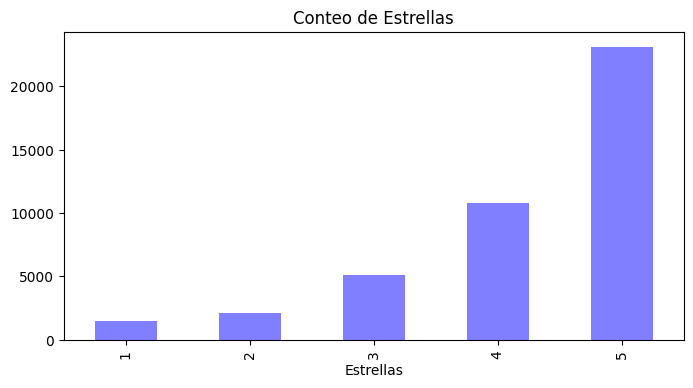

In [8]:
columnaRatingASC = data["Rating"].value_counts( ascending = True )
columnaRatingASC.plot( 
    kind="bar", 
    title="Conteo de Estrellas", 
    figsize=(8, 4), 
    color="Blue", 
    alpha = 0.5, 
    xlabel="Estrellas" )
plt.show()

## Gráfico circular de las Estrellas de Disneyland con Matplotlib 

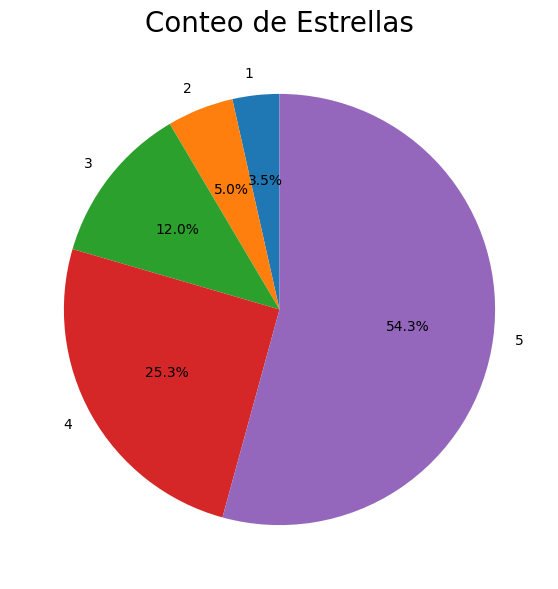

In [9]:
columnaRating = data["Rating"].value_counts( ascending = True )

fig, ax = plt.subplots(figsize=(7, 7))

ax.pie(columnaRating, 
       labels=[1, 2, 3, 4, 5], 
       autopct='%1.1f%%', 
       startangle=90)

ax.set_title("Conteo de Estrellas", fontsize = 20,)

plt.show()


## Gráfico de barras de la cantidad de reseñas por sucursal de Disneyland con Seaborn

<AxesSubplot:xlabel='count', ylabel='Branch'>

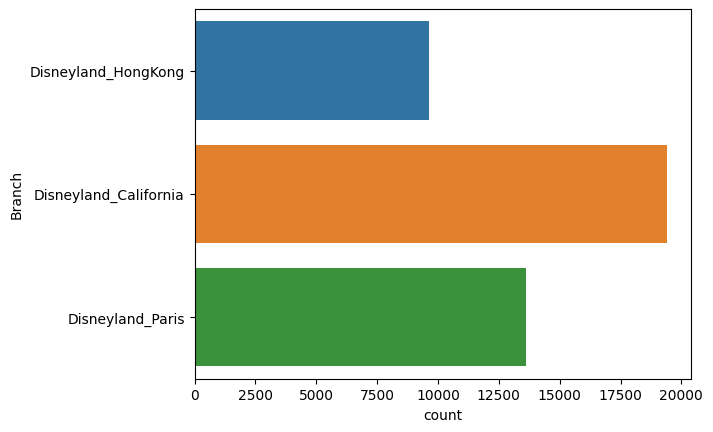

In [10]:
sns.countplot( 
    y = "Branch", 
    data = data, 
    linewidth = 4, 
    # edgecolor="black",
    # color="#98ff98"
    )

## ¿Qué sucursal está mejor valorada?

Como podemos ver, en primer lugar está Disneyland_California, seguido de Disneyland_HongKong y la peor valoración promedio es de Disneyland_Paris.

<AxesSubplot:xlabel='Rating', ylabel='Branch'>

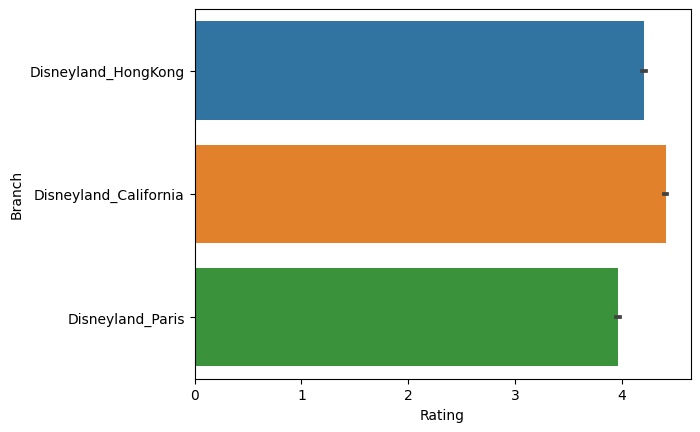

In [11]:
# Seaborn
sns.barplot( y = data["Branch"], x = data["Rating"])

## Descartaremos las columnas innecesarias para trabajar solo con valoraciones y reseñas de textos.

In [12]:
# Observamos las columnas del dataset
data.columns

Index(['Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review_Text',
       'Branch'],
      dtype='object')

In [13]:
# Borramos las columnas con el índice 0, 2, 3, 5.
data.drop( data.columns[[0, 2, 3, 5]], axis = 1, inplace = True )

In [14]:
data.head(4)

,Rating,Review_Text
0,4,If you've ever been to Disneyland anywhere you...
1,4,Its been a while since d last time we visit HK...
2,4,Thanks God it wasn t too hot or too humid wh...
3,4,HK Disneyland is a great compact park. Unfortu...


In [15]:
# Cambiamos el orden de las columnas
data = data[["Review_Text", "Rating"]]

In [16]:
data

,Review_Text,Rating
0,If you've ever been to Disneyland anywhere you...,4
1,Its been a while since d last time we visit HK...,4
2,Thanks God it wasn t too hot or too humid wh...,4
3,HK Disneyland is a great compact park. Unfortu...,4
4,"the location is not in the city, took around 1...",4
...,...,...
42651,i went to disneyland paris in july 03 and thou...,5
42652,2 adults and 1 child of 11 visited Disneyland ...,5
42653,My eleven year old daughter and myself went to...,5
42654,"This hotel, part of the Disneyland Paris compl...",4


## Buscamos valores repetidos, null, outlier, etc (limpiamos el dataset)

* Valores duplicados

In [17]:
# Valores duplicados
data.duplicated().sum()

23

In [18]:
# Hay algunos valores repetidos y tenemos que eliminarlos con drop_duplicates()
data.drop_duplicates( inplace = True )

In [19]:
# Comprobamos nuevamente si hay valores repetidos
data.duplicated().sum() 
# Ya no tenemos valores duplicados en el dataset

0

* Valores null

In [20]:
# Valores null
data.isnull().sum() #En este caso no tenemos

Review_Text    0
Rating         0
dtype: int64

* Campos vacios

In [21]:
# Recorremos con un for la columna "Review_Text" para saber si hay espacios en blanco
espaciosBlancos = []

for index in data["Review_Text"]:
    # Si todos los caracteres en la cadena son espacios en blanco
    if index.isspace() == True:
        espaciosBlancos.append( index )


In [22]:
# No tenemos Reseñas vacias
espaciosBlancos

[]

In [23]:
'''
Ahora vamos a definir una función que etiquetará una valoración 
como positiva si su puntaje es tres o más, y como negativa si es 
menor a tres.
'''

def transformacion( calificacion ):
    
    res = []

    for index in calificacion:
        if index > 2 and index <= 5:
            res.append("Positive")
        elif index > 0 and index <= 2:
            res.append("Negative")
    return res

estrellasTransformadas = transformacion( data["Rating"] )

In [24]:
# Comprobamos los valores
print(estrellasTransformadas)

['Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Po

In [25]:
# Agregamos una nueva columna al dataset
data["Rating_posorneg"] = estrellasTransformadas

In [26]:
# Comprobamos si se agrego la nueva columna
data.head(10)

,Review_Text,Rating,Rating_posorneg
0,If you've ever been to Disneyland anywhere you...,4,Positive
1,Its been a while since d last time we visit HK...,4,Positive
2,Thanks God it wasn t too hot or too humid wh...,4,Positive
3,HK Disneyland is a great compact park. Unfortu...,4,Positive
4,"the location is not in the city, took around 1...",4,Positive
5,"Have been to Disney World, Disneyland Anaheim ...",3,Positive
6,Great place! Your day will go by and you won't...,5,Positive
7,Think of it as an intro to Disney magic for th...,3,Positive
8,"Feel so let down with this place,the Disneylan...",2,Negative
9,I can go on talking about Disneyland. Whatever...,5,Positive
